## BUSINESS PROBLEM 

A multi-store retail company operating across multiple cities sells a wide range of products across categories such as groceries, household essentials, and personal care. Each store manages its own inventory, but the current inventory planning process relies heavily on historical averages, fixed reorder rules, and manual judgment.

This approach fails to capture store-level demand variations, seasonal trends, price changes, and promotional effects, leading to frequent stockouts of high-demand products and overstocking of slow-moving items. As a result, the company faces increased holding costs, lost sales opportunities, and inconsistent product availability across stores.

The company requires a data-driven solution to forecast product demand at the store level and leverage these forecasts to optimize inventory planning decisions, with the goal of reducing stockouts, minimizing excess inventory, and improving overall operational efficiency.

## BUSINESS PROBLEM --> DATA SCIENCE PROBLEM 
Design and implement a data-driven system to forecast future product demand at the store level using historical sales data, seasonal patterns, pricing, and promotional information, and use these demand forecasts to optimize inventory replenishment decisions in order to minimize stockouts and excess inventory across multiple retail stores.

## EXPLANATION 
- Prediction Task - forecast demand (units sold), granularity (per store, per product , over time)   --> This is a time series forecasting problem.

- What are the inputs - Historical sales, dates, price, promotions, store level differences

- Decision making task.- Decide how much inventory to keep and when to reorder. This is an inventory optimization problem.


## OBJECTIVE OF THIS PROJECT 
The objective of this project is to develop a data-driven demand forecasting and inventory optimization system that predicts future product demand at the store level and uses these predictions to support effective inventory planning, with the goal of reducing stockouts, minimizing excess inventory, and improving overall operational efficiency across retail stores.

## In very simple terms, this project aims to:
- Predict how much of each product will be sold in each store in the future
- Use those predictions to decide how much inventory should be kept and when to reorder
- Avoid situations where products are either unavailable or unnecessarily overstocked

## STEP 2: Data Understanding & Data Requirements


## STEP 3: DATA COLLECTION AND INSPECTION 

In [1]:
import pandas as pd
import numpy as np

In [3]:
# load the dataset 
df = pd.read_csv("data/Walmart.csv")
df.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
# check dataset size
df.shape

(6435, 8)

In [5]:
# check column names 
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
# column information and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# check for missing values 
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Statistical Summary
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
# store level understanding 
# how many stores 
df['Store'].nunique()

45

In [13]:
# Time Coverage Check
df['Date'].min(), df['Date'].max()
# Your Date column is still an object (string), NOT a datetime.

('01-04-2011', '31-12-2010')

## STEP 4 - DATA CLEANING AND PREPROCESSING 

In [18]:
# Convert Date to Datetime
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [22]:
# Re-check Time Coverage
df['Date'].min(), df['Date'].max()


(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [23]:
# Sort the Data by Time
df = df.sort_values(by='Date')

In [24]:
# check for duplicates 
df.duplicated().sum()

np.int64(0)

In [27]:
# Select Relevant Columns
df = df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag']]


In [35]:
# Rename Columns
df.rename(columns={'Weekly_Sales': 'Sales'}, inplace=True)

In [36]:
df.head()

,Store,Date,sales,Holiday_Flag
0,1,2010-02-05,1643690.90,0
1287,10,2010-02-05,2193048.75,0
5148,37,2010-02-05,536006.73,0
2288,17,2010-02-05,789036.02,0
4147,30,2010-02-05,465108.52,0


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   sales         6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 251.4 KB


## STEP 5: Exploratory Data Analysis (EDA).
For demand forecasting & inventory optimization, EDA helps us understand:
- 📈 Trend → Is demand increasing or decreasing?
- 🔁 Seasonality → Do sales repeat yearly or weekly?
- 🎉 Holidays → Do promotions create spikes?
- 📊 Variability → How risky is demand?

#### Sales Over Time

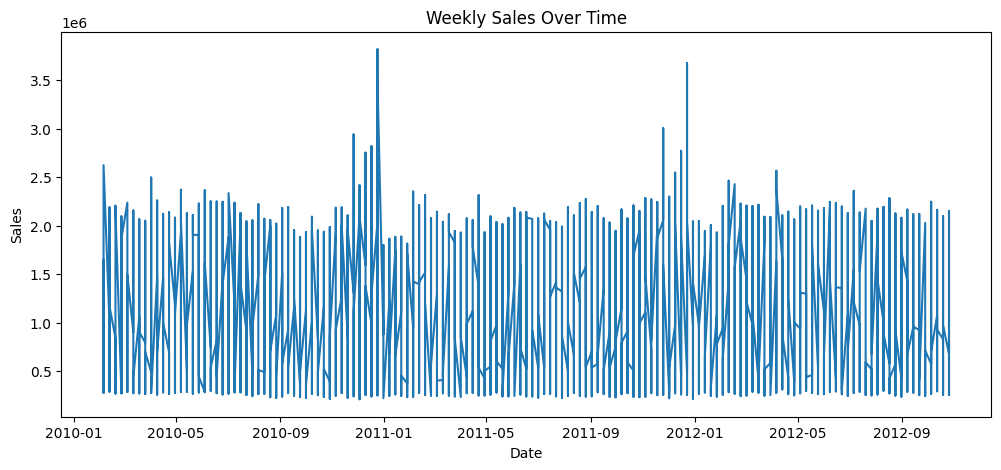

In [37]:
# Plot Total Sales Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


#### Store-Level Demand Behavior

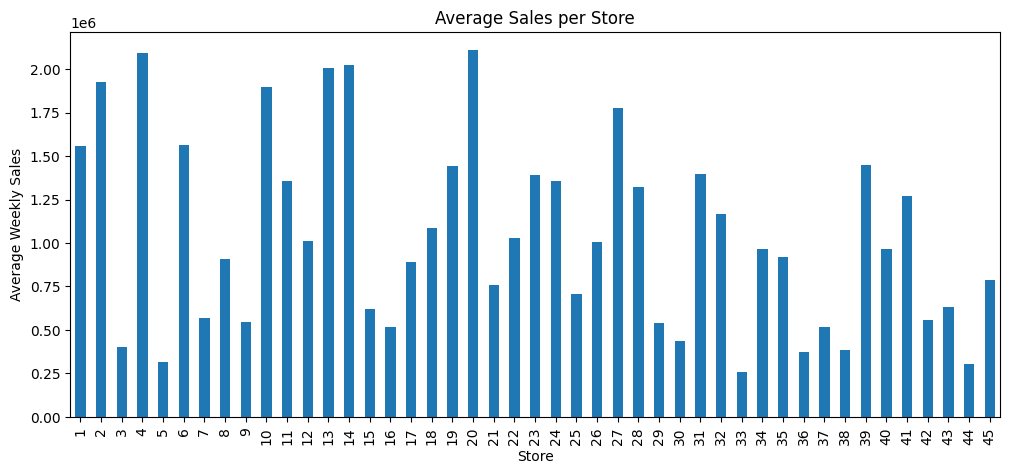

In [39]:
# Average Sales per Store
df.groupby('Store')['sales'].mean().plot(kind='bar', figsize=(12,5))
plt.title('Average Sales per Store')
plt.ylabel('Average Weekly Sales')
plt.show()



#### Holiday vs Non-Holiday Sales

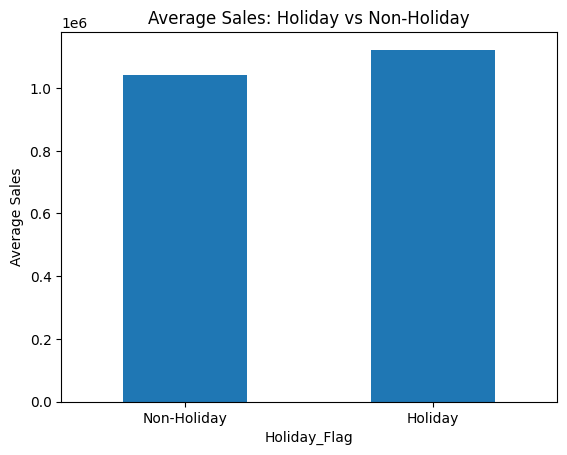

In [40]:
# Compare Holiday vs Non-Holiday Sales
df.groupby('Holiday_Flag')['sales'].mean().plot(kind='bar')
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xticks([0,1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel('Average Sales')
plt.show()


#### Sales Distribution

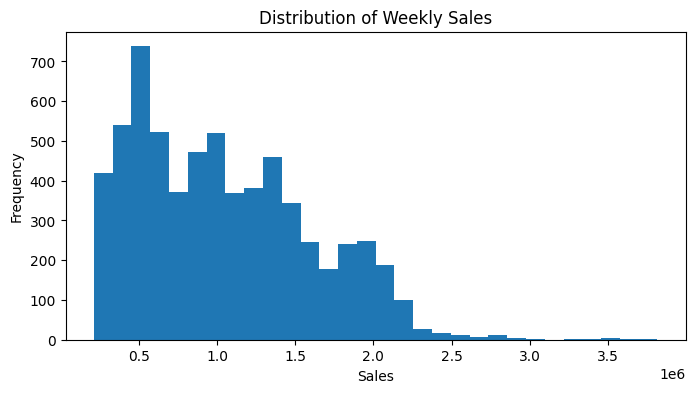

In [41]:
# Histogram of Sales
plt.figure(figsize=(8,4))
plt.hist(df['sales'], bins=30)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


#### Time-Based Aggregation

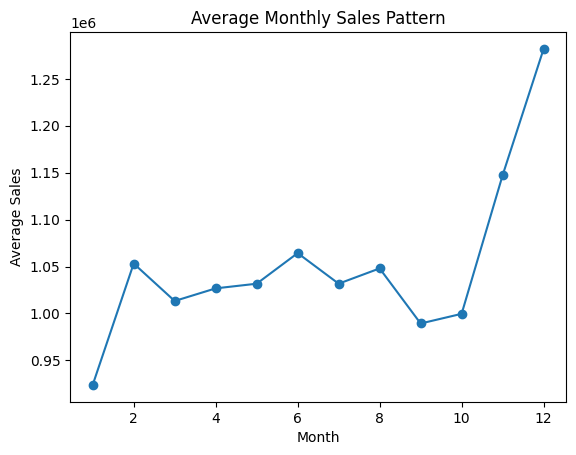

In [43]:
# Monthly Sales Pattern
df['month'] = df['Date'].dt.month

df.groupby('month')['sales'].mean().plot(kind='line', marker='o')
plt.title('Average Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()


## STEP 6: Feature Engineering (Time Series)

In [44]:
# Calendar Features (Seasonality)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week.astype(int)


In [45]:
# Create Lag Features
df['lag_1'] = df['sales'].shift(1)
df['lag_2'] = df['sales'].shift(2)
df['lag_4'] = df['sales'].shift(4)


In [46]:
# Create Rolling Mean Features
df['rolling_mean_4'] = df['sales'].rolling(window=4).mean()
df['rolling_mean_8'] = df['sales'].rolling(window=8).mean()


In [47]:
df

,Store,Date,sales,Holiday_Flag,month,year,week,lag_1,lag_2,lag_4,rolling_mean_4,rolling_mean_8
0,1,2010-02-05,1643690.90,0,2,2010,5,NaN,NaN,NaN,NaN,NaN
1287,10,2010-02-05,2193048.75,0,2,2010,5,1643690.90,NaN,NaN,NaN,NaN
5148,37,2010-02-05,536006.73,0,2,2010,5,2193048.75,1643690.90,NaN,NaN,NaN
2288,17,2010-02-05,789036.02,0,2,2010,5,536006.73,2193048.75,NaN,1.290446e+06,NaN
4147,30,2010-02-05,465108.52,0,2,2010,5,789036.02,536006.73,1643690.90,9.958000e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,10,2012,43,2031650.55,1704357.62,534970.68,1.441295e+06,1.164384e+06
714,5,2012-10-26,319550.77,0,10,2012,43,688940.94,2031650.55,1340232.55,1.186125e+06,1.096186e+06
5719,40,2012-10-26,921264.52,0,10,2012,43,319550.77,688940.94,1704357.62,9.903517e+05,9.933000e+05
2573,18,2012-10-26,1127516.25,0,10,2012,43,921264.52,319550.77,2031650.55,7.643181e+05,1.083560e+06


In [48]:
# Handling Missing Values Created by Lags
df = df.dropna()


In [49]:
df

,Store,Date,sales,Holiday_Flag,month,year,week,lag_1,lag_2,lag_4,rolling_mean_4,rolling_mean_8
3146,23,2010-02-05,1364721.58,0,2,2010,5,1033017.37,677231.63,789036.02,8.850198e+05,1.087733e+06
3289,24,2010-02-05,1388725.63,0,2,2010,5,1364721.58,1033017.37,465108.52,1.115924e+06,1.055862e+06
2574,19,2010-02-05,1507637.17,0,2,2010,5,1388725.63,1364721.58,677231.63,1.323525e+06,9.701856e+05
2860,21,2010-02-05,798593.88,0,2,2010,5,1507637.17,1388725.63,1033017.37,1.264920e+06,1.003009e+06
3575,26,2010-02-05,1034119.21,0,2,2010,5,798593.88,1507637.17,1364721.58,1.182269e+06,1.033644e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,10,2012,43,2031650.55,1704357.62,534970.68,1.441295e+06,1.164384e+06
714,5,2012-10-26,319550.77,0,10,2012,43,688940.94,2031650.55,1340232.55,1.186125e+06,1.096186e+06
5719,40,2012-10-26,921264.52,0,10,2012,43,319550.77,688940.94,1704357.62,9.903517e+05,9.933000e+05
2573,18,2012-10-26,1127516.25,0,10,2012,43,921264.52,319550.77,2031650.55,7.643181e+05,1.083560e+06


## STEP 7 – Train–Test Split

In [52]:
# Sort by Date
df = df.sort_values('Date')

In [53]:
# Define Features (X) and Target (y)
X = df.drop(columns=['sales', 'Date'])
y = df['sales']


In [54]:
# Time-Based Split
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In [55]:
# verify the split 
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(5142, 10) (1286, 10)
(5142,) (1286,)


In [56]:
#check date split 
df['Date'].iloc[split_index-1], df['Date'].iloc[split_index]

(Timestamp('2012-04-13 00:00:00'), Timestamp('2012-04-13 00:00:00'))

## STEP 8 – Baseline Forecasting Model

#### Implementing Naïve Forecast

In [59]:
# pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/89/3c/45c352094cfa60050bcbb967b1faf246b22e93cb459f2f907b600f2ceda5/scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.10.0 from https://files.pythonhosted.org/packages/f1/d0/22ec7036ba0b0a35bccb7f25ab407382ed34af0b111475eb301c16f8a2e5/scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.3.0 from https://files.pythonhosted.org/packages/7b/91/984aca2ec129e2757d1e4e3c81c3fcda9d0f85b74670a094cc443d9ee949/joblib-1.5.3-py3-none-any.whl.metadata
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for threadpoolctl>=3.2.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import numpy as np

# Naive forecast: predict last observed value
y_pred_naive = y_test.shift(1)

# Drop first NaN created by shift
y_test_naive = y_test.iloc[1:]
y_pred_naive = y_pred_naive.iloc[1:]


In [61]:
# calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_naive, y_pred_naive)
rmse = np.sqrt(mean_squared_error(y_test_naive, y_pred_naive))
mape = np.mean(np.abs((y_test_naive - y_pred_naive) / y_test_naive)) * 100

print(f"Naive Forecast MAE: {mae:.2f}")
print(f"Naive Forecast RMSE: {rmse:.2f}")
print(f"Naive Forecast MAPE: {mape:.2f}%")


Naive Forecast MAE: 616269.00
Naive Forecast RMSE: 760512.64
Naive Forecast MAPE: 83.22%


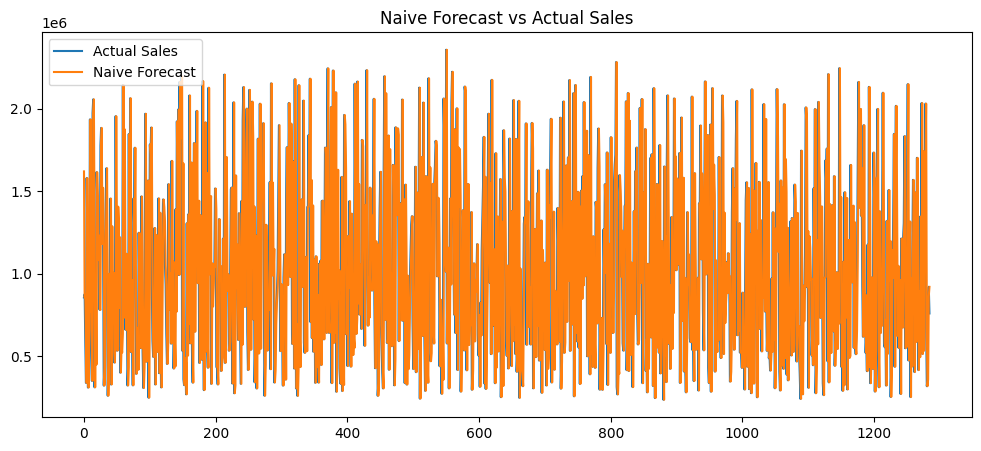

In [62]:
# Actual VS NAive Forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_naive.values, label='Actual Sales')
plt.plot(y_pred_naive.values, label='Naive Forecast')
plt.legend()
plt.title('Naive Forecast vs Actual Sales')
plt.show()


## STEP 9 – Advanced Forecasting Models

#### Prepare Data for SARIMA

In [63]:
# Filter One Store
store_id = 1
store_df = df[df['Store'] == store_id].copy()


In [64]:
# Set Date as Index
store_df.set_index('Date', inplace=True)
store_df = store_df.sort_index()

In [65]:
# Train–Test Split (Again, Time-Based)
split_index = int(len(store_df) * 0.8)

train = store_df.iloc[:split_index]
test  = store_df.iloc[split_index:]

In [67]:
# SARIMA Parameters (Don’t Overthink Now)
(order := (1,1,1), seasonal_order := (1,1,1,52))

((1, 1, 1), (1, 1, 1, 52))

In [71]:
# Train SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train['sales'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_model = model.fit(disp=False)

C:\Users\irale\Downloads\Retail Demand Forecasting sand Inventory Optimization\retail\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\irale\Downloads\Retail Demand Forecasting sand Inventory Optimization\retail\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\irale\Downloads\Retail Demand Forecasting sand Inventory Optimization\retail\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [77]:
# Generate Forecasts
forecast = sarima_model.forecast(steps=len(test))


In [78]:
# Evaluation Metrics
import numpy as np

mae = np.mean(np.abs(test['sales'] - forecast))
rmse = np.sqrt(np.mean((test['sales'] - forecast) ** 2))
mape = np.mean(np.abs((test['sales'] - forecast) / test['sales'])) * 100

print(f"SARIMA MAE: {mae:.2f}")
print(f"SARIMA RMSE: {rmse:.2f}")
print(f"SARIMA MAPE: {mape:.2f}%")


SARIMA MAE: 126302.24
SARIMA RMSE: 134731.59
SARIMA MAPE: 8.10%


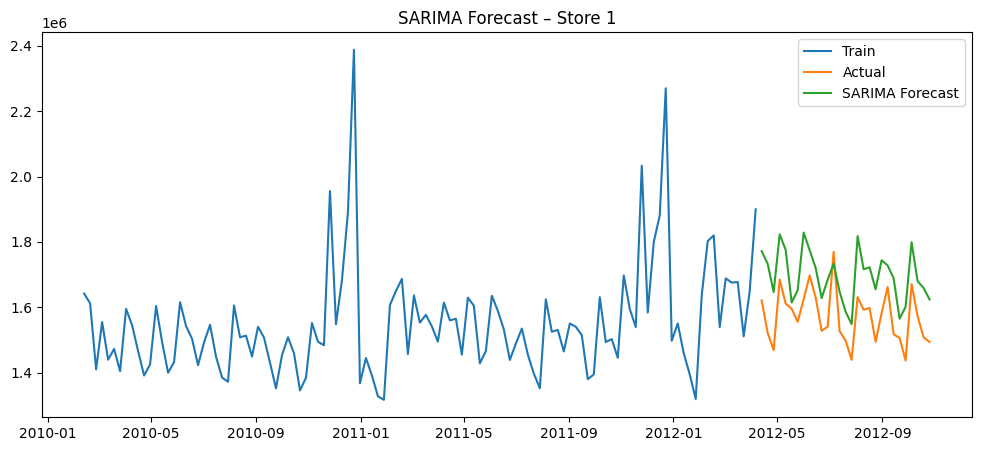

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual')
plt.plot(test.index, forecast, label='SARIMA Forecast')
plt.legend()
plt.title(f'SARIMA Forecast – Store {store_id}')
plt.show()


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [73]:
y_pred_rf = rf_model.predict(X_test)


In [74]:
import numpy as np

mae = np.mean(np.abs(y_test - y_pred_rf))
rmse = np.sqrt(np.mean((y_test - y_pred_rf) ** 2))
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest MAPE: {mape:.2f}%")


Random Forest MAE: 141258.88
Random Forest RMSE: 210929.87
Random Forest MAPE: 15.70%


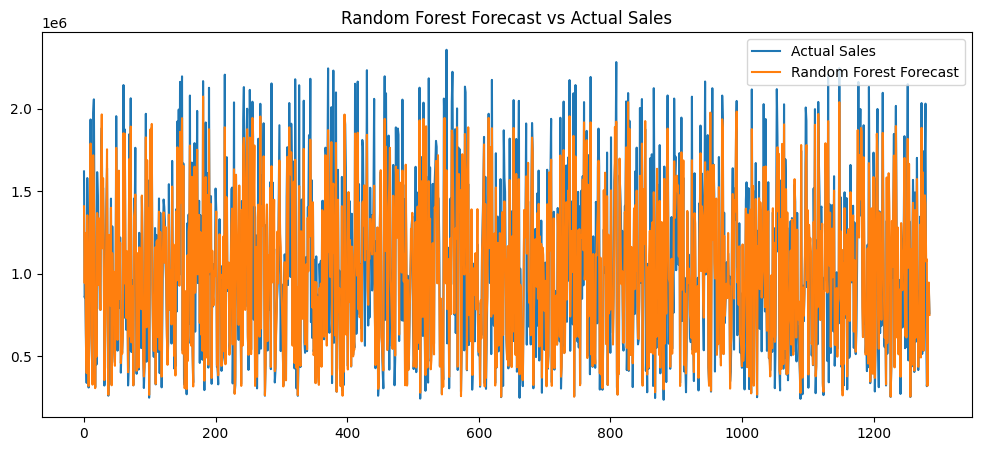

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred_rf, label='Random Forest Forecast')
plt.legend()
plt.title('Random Forest Forecast vs Actual Sales')
plt.show()


In [76]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


Store             0.479091
rolling_mean_4    0.328105
lag_1             0.067815
lag_2             0.066813
rolling_mean_8    0.021194
lag_4             0.016094
week              0.013942
month             0.003178
year              0.002777
Holiday_Flag      0.000990
dtype: float64

In [80]:
import numpy as np

lead_time = 2  # weeks
service_level_z = 1.65  # 95% service level

avg_demand = forecast.mean()
std_demand = forecast.std()

safety_stock = service_level_z * std_demand * np.sqrt(lead_time)
reorder_point = (avg_demand * lead_time) + safety_stock

print("Safety Stock:", round(safety_stock))
print("Reorder Point:", round(reorder_point))


Safety Stock: 182859
Reorder Point: 3573778


In [ ]:
import pandas as pd
import gc

sales_calendar = pd.read_csv("data/calendar.csv")
gc.collect()

In [ ]:
sales_calendar.dtypes

In [ ]:
sales_calendar["d"] = sales_calendar["d"].astype("category")

In [ ]:
event_cols = ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]

for col in event_cols:
    sales_calendar[col] = pd.Categorical(sales_calendar[col])
    gc.collect()


In [ ]:
sales_calendar[col] = (
    sales_calendar[col]
    .add_categories("No_Event")
    .fillna("No_Event")
)


In [1]:
# Restart kernel first, then run this cell
import gc
gc.collect()

3

## STEP 2: DATA CLEANING AND PREPROCESSING 

In [2]:
# pip install numpy pandas

In [3]:
# importing and installing the neccessary libraries 
import pandas as pd

# load the dataset 
sales_df = pd.read_csv("data/sales_train_validation.csv")
sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


- We need to reshape the sales data
**current format** --> item_id|store_id|d_1|d_2|.....|d_1913
**requried format** --> item_id|...|store_id|day|sales

- Models understand the row, not hundreds of days columns, And it would be easier to merge with the calendar data.

- This step is called as **Melting or Unpivoting the data**

In [4]:
# Identify ID columns (non-day columns)
id_columns = [
    "id",
    "item_id",
    "dept_id",
    "cat_id",
    "store_id",
    "state_id"
]

In [5]:
# # Melt the dataframe from wide to long format
sales_long = sales_df.melt(id_vars = id_columns, var_name = "day", value_name = "sales")
sales_long.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


- here each row means **"this product was sold X units in this store on this day"**

In [6]:
# check shape
sales_long.shape

(58327370, 8)

In [7]:
# check for missing values 
sales_long.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
day         0
sales       0
dtype: int64

In [8]:
# checking the sales distribution 
sales_long["sales"].describe()

count    5.832737e+07
mean     1.126322e+00
std      3.873108e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.630000e+02
Name: sales, dtype: float64

##### MERGING CALENDER DATA 

In [9]:
# load the calender dataset 
calendar_df = pd.read_csv("data/calendar.csv")
calendar_df.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [10]:
calendar_df.dtypes

date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object

**Key columns you’ll notice:**
- d → matches day column in sales data
- date → actual calendar date
- wm_yr_wk → Walmart year-week
- event_name_1, event_type_1
- snap_CA, snap_TX, snap_WI

In [11]:
# Reduce memory usage in sales data

# Convert sales to smaller integer type
sales_long["sales"] = sales_long["sales"].astype("int16")

# Convert categorical columns to category type
cat_cols = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id", "day"]
for col in cat_cols:
    sales_long[col] = sales_long[col].astype("category")

# Check memory usage
sales_long.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   day       category
 7   sales     int16   
dtypes: category(7), int16(1)
memory usage: 671.4 MB


In [13]:
calendar_df["d"] = calendar_df["d"].astype("category")
calendar_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [14]:
event_cols = ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]

for col in event_cols:
    calendar_df[col] = pd.Categorical(calendar_df[col])
    gc.collect()


In [17]:
calendar_df.dtypes

date              object
wm_yr_wk           int64
weekday           object
wday               int64
month              int64
year               int64
d               category
event_name_1    category
event_type_1    category
event_name_2    category
event_type_2    category
snap_CA            int64
snap_TX            int64
snap_WI            int64
dtype: object

In [19]:
calendar_df[col] = pd.Categorical(calendar_df[col])

In [20]:
calendar_df[col] = (
    calendar_df[col]
    .add_categories("No_Event")
    .fillna("No_Event")
)

AttributeError: 'Series' object has no attribute 'add_categories'

In [23]:
event_cols = ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]

for col in event_cols:
    calendar_df[col] = pd.Categorical(calendar_df[col])
    calendar_df[col] = (
        calendar_df[col]
        .add_categories("No_Event")
        .fillna("No_Event")
    )


AttributeError: 'Series' object has no attribute 'add_categories'

In [ ]:
# merge calender data with the sales data
sales_calendar = sales_long.merge(
    calendar_df,
    left_on="day",
    right_on="d",
    how="left"
)
sales_calendar.head(8)

In [ ]:
# drop duplicate day column after merge 
sales_calendar.drop(columns=["d"],inplace=True)
sales_calendar.head(15)

In [ ]:
sales_calendar.shape

##### CHECK MISSING VALUES 

In [ ]:
# Check missing values after merge
sales_calendar.isnull().sum()

In [ ]:
sales_calendar["date"].dtype

In [ ]:
# Convert date column to datetime
sales_calendar["date"] = pd.to_datetime(sales_calendar["date"])


In [ ]:
# Find the latest date
max_date = sales_calendar["date"].max()

# Keep only the most recent 365 days
sales_calendar_recent = sales_calendar[
    sales_calendar["date"] >= (max_date - pd.Timedelta(days=365))
].copy()

# Check reduced dataset size
sales_calendar_recent.shape


 ##### HANDLE EVENT-RELATED MISSING VALUES 


In [ ]:
import gc

event_cols = ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]

for col in event_cols:
    sales_calendar[col] = pd.Categorical(sales_calendar[col])
    gc.collect()


In [ ]:
for col in event_cols:
    sales_calendar[col] = (
        sales_calendar[col]
        .add_categories("No_Event")
        .fillna("No_Event")
    )


In [ ]:
sales_calendar[event_cols].dtypes


In [ ]:
# Fill missing event information

event_cols = ["event_name_1", "event_name_2", "event_type_1", "event_type_2"]

for col in event_cols:
    sales_calendar[col] = sales_calendar[col].fillna("No_Event")

**Why this matters**
- Models don’t handle NaN well
- “No event” is meaningful information

In [ ]:
# Convert date column to datetime
sales_calendar["date"] = pd.to_datetime(sales_calendar["date"])

In [ ]:
# Check for negative sales
(sales_calendar["sales"] < 0).sum()


In [ ]:
# Load sell prices data
sell_prices = pd.read_csv("data/sell_prices.csv")

# Quick look at the data
sell_prices.head()

In [ ]:
# Reduce memory usage BEFORE merging

# Convert categorical identifiers
cat_cols = ["store_id", "item_id"]
for col in cat_cols:
    sales_calendar[col] = sales_calendar[col].astype("category")
    sell_prices[col] = sell_prices[col].astype("category")

# Reduce wm_yr_wk size
sales_calendar["wm_yr_wk"] = sales_calendar["wm_yr_wk"].astype("int16")
sell_prices["wm_yr_wk"] = sell_prices["wm_yr_wk"].astype("int16")

# Reduce price size
sell_prices["sell_price"] = sell_prices["sell_price"].astype("float32")

In [ ]:
# Merge sell prices on reduced data
sales_full = sales_calendar_recent.merge(
    sell_prices,
    on=["store_id", "item_id", "wm_yr_wk"],
    how="left"
)

In [ ]:
# STEP 4.4.C.3: Quick checks
sales_full.shape
sales_full["sell_price"].isnull().sum()
sales_full.head()


In [ ]:
# STEP 4.4.F.1: Price availability flag
sales_full["price_available"] = sales_full["sell_price"].notna().astype("int8")

In [ ]:
# Fill missing prices with 0
sales_full["sell_price"] = sales_full["sell_price"].fillna(0)


In [ ]:
# STEP 4.4.F.3: Final checks
sales_full["sell_price"].isnull().sum()
sales_full["price_available"].value_counts()
sales_full.head()

## STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# dataset shape
sales_full.shape

In [ ]:
# datatypes 
sales_full.info()

##### Sales Distribution

In [ ]:
# Sales statistics
sales_full["sales"].describe()


In [ ]:
# Percentage of zero-sales days
zero_sales_pct = (sales_full["sales"] == 0).mean() * 100
zero_sales_pct


##### Overall Sales Trend Over Time (SAFE)

In [ ]:
# Aggregate daily sales
daily_sales = sales_full.groupby("date")["sales"].sum().reset_index()


In [ ]:
# pip install matplotlib seaborn 

In [ ]:
# Plot daily sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


##### Weekly Seasonality

In [ ]:
# Average sales by weekday
weekday_sales = sales_full.groupby("weekday")["sales"].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(weekday_sales["weekday"], weekday_sales["sales"])
plt.title("Average Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Units Sold")
plt.show()


##### Category-Level Demand

In [ ]:
# Average sales by category
cat_sales = sales_full.groupby("cat_id")["sales"].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(cat_sales["cat_id"], cat_sales["sales"])
plt.title("Average Sales by Category")
plt.xlabel("Category")
plt.ylabel("Average Units Sold")
plt.show()


##### Price vs Demand

In [ ]:
# STEP 5.6.1: Sample data to avoid heavy plotting
sample_df = sales_full.sample(100_000, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(sample_df["sell_price"], sample_df["sales"], alpha=0.2)
plt.title("Price vs Sales (Sampled)")
plt.xlabel("Sell Price")
plt.ylabel("Units Sold")
plt.show()


## STEP 4: FEATURE ENGINEERING 

In [ ]:
#Sort data by store, item, and date (required for lag features)
sales_full = sales_full.sort_values(
    ["store_id", "item_id", "date"]
)

In [ ]:
# create Lag features
lag_days = [1, 7, 14]

for lag in lag_days:
    sales_full[f"lag_{lag}"] = (
        sales_full
        .groupby(["store_id", "item_id"], observed=False)["sales"]
        .shift(lag)
    )


In [ ]:
# STEP 6.3: Rolling mean features (warning-free)
rolling_windows = [7, 14]

for window in rolling_windows:
    sales_full[f"rmean_{window}"] = (
        sales_full
        .groupby(["store_id", "item_id"], observed=False)["sales"]
        .transform(lambda x: x.rolling(window).mean())
    )


In [ ]:
# price lag feature 
sales_full["price_lag_1"] = (
    sales_full
    .groupby(["store_id", "item_id"], observed=False)["sell_price"]
    .shift(1)
)

# Price change ratio
sales_full["price_change"] = (
    (sales_full["sell_price"] - sales_full["price_lag_1"])
    / (sales_full["price_lag_1"] + 1e-5)
)

In [ ]:
# STEP 6.5: Time-based features
sales_full["dayofweek"] = sales_full["date"].dt.dayofweek
sales_full["weekofyear"] = sales_full["date"].dt.isocalendar().week.astype("int16")
sales_full["month"] = sales_full["date"].dt.month


In [ ]:
# STEP 6.6: Drop rows with NaNs in engineered features
feature_cols = [
    "lag_1", "lag_7", "lag_14",
    "rmean_7", "rmean_14",
    "price_lag_1", "price_change"
]

sales_full_fe = sales_full.dropna(subset=feature_cols)


## STEP 4: Train–Validation Split & Modeling

In [ ]:
# STEP 7.1: Define target variable
TARGET = "sales"

# STEP 7.1: Feature columns
FEATURES = [
    "lag_1", "lag_7", "lag_14",
    "rmean_7", "rmean_14",
    "sell_price", "price_available",
    "price_lag_1", "price_change",
    "dayofweek", "weekofyear", "month"
]


##### TIME BASED VALIDATION SPLIT

In [ ]:
# STEP 7.2: Define validation start date
max_date = sales_full_fe["date"].max()
val_start_date = max_date - pd.Timedelta(days=28)

# STEP 7.2: Split data with explicit copies
train_data = sales_full_fe[sales_full_fe["date"] < val_start_date].copy()
val_data = sales_full_fe[sales_full_fe["date"] >= val_start_date].copy()

# Check split sizes
train_data.shape, val_data.shape


##### PREPARE TRAINING MODEL

In [ ]:
# STEP 7.3: Prepare X and y

X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_val = val_data[FEATURES]
y_val = val_data[TARGET]


##### BASELINE MODEL - NAIVE FOREST
**NAIVE FOREST** --> Tomorrow’s sales = yesterday’s sales

In [ ]:
# Naive baseline prediction
val_data["naive_pred"] = val_data["lag_1"]



##### EVALUATION METRIC (RMSE)

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# STEP 7.5: RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# STEP 7.5: Naive RMSE
naive_rmse = rmse(y_val, val_data["naive_pred"])
naive_rmse


In [ ]:
import lightgbm as lgb

# STEP 7.6: Create LightGBM datasets
train_lgb = lgb.Dataset(X_train, label=y_train)
val_lgb = lgb.Dataset(X_val, label=y_val, reference=train_lgb)

# STEP 7.6: Model parameters (stable defaults)
params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity": -1
}


In [ ]:
# STEP 7.6: Train LightGBM model
lgb_model = lgb.train(
    params,
    train_lgb,
    num_boost_round=300,
    valid_sets=[val_lgb],
    early_stopping_rounds=50,
    verbose_eval=50
)


In [ ]:
# STEP 7.7: Predictions on validation set
val_preds = lgb_model.predict(X_val)

# STEP 7.7: RMSE comparison
lgb_rmse = rmse(y_val, val_preds)

naive_rmse, lgb_rmse


In [ ]:
# STEP 7.8: Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10, figsize=(8, 4))
